In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pylab as plt

C:\Users\mero_\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('data_6.csv',index_col=None, engine='c') # import data
print('original datasize:', df.shape)
df.dropna(inplace=True)
print('adjusted datasize:', df.shape)
print('features: ', df.columns)

original datasize: (475, 11)
adjusted datasize: (474, 11)
features:  Index(['Kd', 'SSA', 'C%', 'H/C', 'O/C', 'E', 'S', 'A', 'B', 'V', 'log(Kd)'], dtype='object')


In [3]:
corr1=pd.DataFrame(index=df.columns, columns = df.columns) 
p1=pd.DataFrame(index=df.columns, columns = df.columns)
n_fea = len(df.columns)
for i in range(n_fea) :
    for j in range(n_fea):
        #coef,p = pearsonr(df.iloc[:,i],df.iloc[:,j])
        coef,p = spearmanr(df.iloc[:,i],df.iloc[:,j])
        corr1.iloc[i,j] = coef
        p1.iloc[i,j] = p

In [4]:
# p-values
p1

,Kd,SSA,C%,H/C,O/C,E,S,A,B,V,log(Kd)
Kd,0,3.1885e-05,2.69004e-05,8.4708e-06,7.28052e-05,0.207837,7.5259e-11,5.36837e-27,5.05338e-44,6.28324e-14,0
SSA,3.1885e-05,0,3.7396e-25,0.563841,1.54497e-29,0.0847434,0.188469,1.13646e-05,2.06748e-13,2.37021e-08,3.1885e-05
C%,2.69004e-05,3.7396e-25,0,0.0210335,3.06544e-36,2.6873e-06,0.0421121,0.045916,0.00298623,0.913001,2.69004e-05
H/C,8.4708e-06,0.563841,0.0210335,0,2.51526e-05,0.607614,0.10595,0.608697,0.00132522,0.230623,8.4708e-06
O/C,7.28052e-05,1.54497e-29,3.06544e-36,2.51526e-05,0,0.214495,0.90652,0.00325958,5.27213e-08,7.32453e-06,7.28052e-05
E,0.207837,0.0847434,2.6873e-06,0.607614,0.214495,0,7.09004e-61,1.69029e-05,4.09031e-08,5.29858e-16,0.207837
S,7.5259e-11,0.188469,0.0421121,0.10595,0.90652,7.09004e-61,0,1.34848e-23,6.07462e-41,8.18063e-38,7.5259e-11
A,5.36837e-27,1.13646e-05,0.045916,0.608697,0.00325958,1.69029e-05,1.34848e-23,0,1.53349e-60,5.63905e-18,5.36837e-27
B,5.05338e-44,2.06748e-13,0.00298623,0.00132522,5.27213e-08,4.09031e-08,6.07462e-41,1.53349e-60,0,1.43266e-71,5.05338e-44
V,6.28324e-14,2.37021e-08,0.913001,0.230623,7.32453e-06,5.29858e-16,8.18063e-38,5.63905e-18,1.43266e-71,0,6.28324e-14


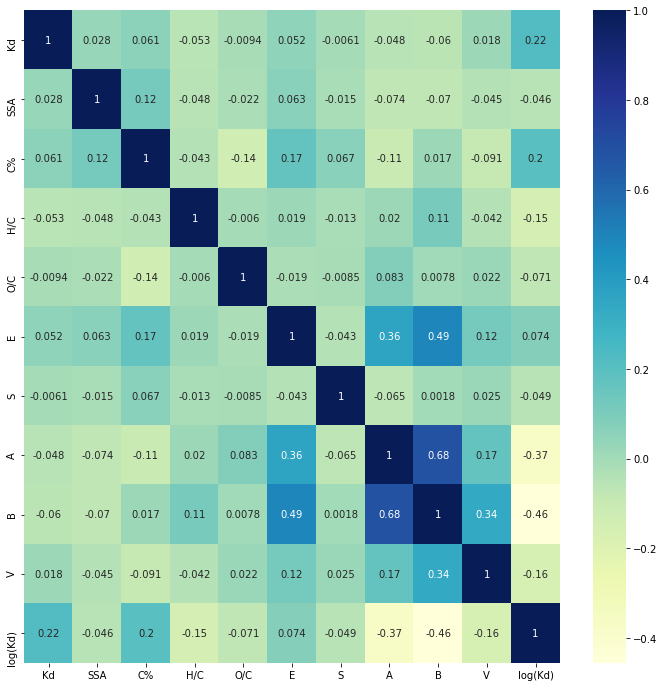

In [5]:
# plotting Pearson correlation heatmap
import seaborn as sb
fig, ax = plt.subplots(figsize=(12,12))  

ax = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
 
# displaying heatmap
plt.show()

In [6]:
# texture parameters

df=pd.read_csv('texture parameters(1).csv',index_col=None, engine='c') # import data
print('original datasize:', df.shape)
df.dropna(inplace=True)
print('adjusted datasize:', df.shape)
df

original datasize: (443, 3)
adjusted datasize: (443, 3)


,SSA,size,pore volume
0,11.428571,0.382619,0.111386
1,11.428571,0.389286,0.113186
2,11.428571,0.387286,0.109486
3,11.428571,0.389619,0.112386
4,28.571429,0.961381,0.285614
...,...,...,...
438,0.034091,0.000000,0.050000
439,0.022727,0.000000,0.042762
440,0.013636,0.000000,0.041204
441,0.126850,0.000000,0.039646


In [7]:
corr1=pd.DataFrame(index=df.columns, columns = df.columns)
p1=pd.DataFrame(index=df.columns, columns = df.columns)

n_fea = len(df.columns)
for i in range(n_fea) :
    for j in range(n_fea):
        #coef,p = pearsonr(df.iloc[:,i],df.iloc[:,j])
        coef,p = spearmanr(df.iloc[:,i],df.iloc[:,j])
        corr1.iloc[i,j] = coef
        p1.iloc[i,j] = p

In [8]:
corr2 = corr1.astype({col:float for col in p1})
corr2.rename(index={'size':'Size','pore volume':'Pore volume'},columns={'pore volume':'Pore volume','size':'Size'},inplace=True)

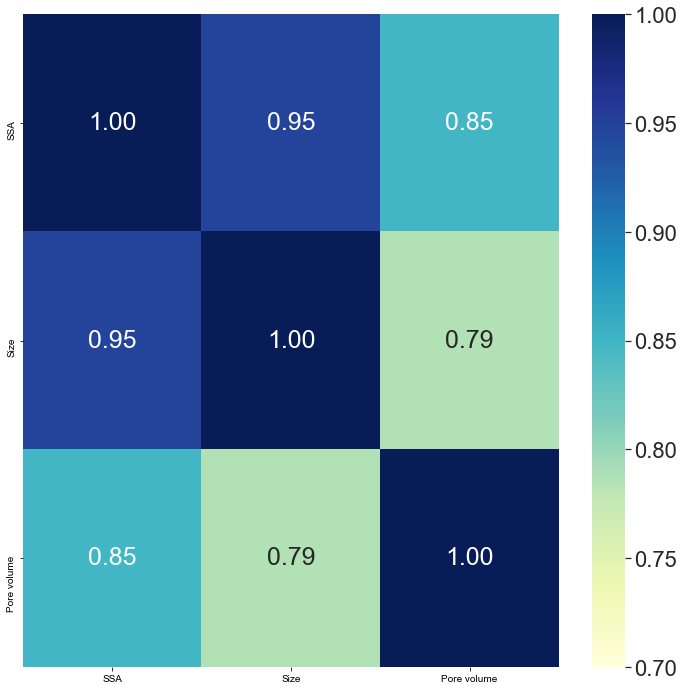

In [9]:
# Pearson correlation for texture parameters
import seaborn as sb
fig, ax = plt.subplots(figsize=(12,12))  
# plotting correlation heatmap
sb.set(font_scale=2)
ax = sb.heatmap(corr2, cmap="YlGnBu",annot=True,fmt=".2f",vmin=0.7, annot_kws={"size": 25}) # 

# displaying heatmap
plt.show()